<a href="https://colab.research.google.com/github/drashtikshah/Data-analytics-project-file./blob/main/TSA_MINI_PROJECT_79_83_97_parking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Dataset name: Parking Birmingham***

Problem to be solved to find the highest month were parking is required the most and is the most visited birmingham in which month to let the owner of the parking slot comes to know how to efficiently use the parking.

Importing library

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set()

importing the dataset

In [ ]:
data = '/content/dataset.csv'
df = pd.read_csv(data)
df

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48
...,...,...,...,...
35712,Shopping,1920,1517,2016-12-19 14:30:33
35713,Shopping,1920,1487,2016-12-19 15:03:34
35714,Shopping,1920,1432,2016-12-19 15:29:33
35715,Shopping,1920,1321,2016-12-19 16:03:35


--------------------------------------------------------------------------------------------------------

***Exploratory data analysis***

to view the shape of dataset

In [ ]:
df.shape

(35717, 4)

printing the first 5 rows of the dataset

In [ ]:
df.head(5)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


info the dataset to see a concise summay of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


converting the last updated column(as it is a object data type) into date time format

In [ ]:
df['LastUpdated'] = pd.to_datetime(df['LastUpdated'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SystemCodeNumber  35717 non-null  object        
 1   Capacity          35717 non-null  int64         
 2   Occupancy         35717 non-null  int64         
 3   LastUpdated       35717 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


splitting the column of last updated column into two separate columns of date and time column

In [ ]:
df['Date'] = df['LastUpdated'].dt.date
df['Time'] = df['LastUpdated'].dt.time

checking the dataset

In [ ]:
df.head(5)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Date,Time
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016-10-04,07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016-10-04,08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016-10-04,08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,2016-10-04,09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,2016-10-04,09:59:48


removing the redundant columns

In [ ]:
cols = ['SystemCodeNumber', 'Capacity', 'LastUpdated']
df.drop(cols, axis=1, inplace=True)

checking the datatype of columns

In [ ]:
df.dtypes

Occupancy     int64
Date         object
Time         object
dtype: object

we yet see date and time as object data type hence converting into datetime format

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Occupancy             int64
Date         datetime64[ns]
Time                 object
dtype: object

working with time-series data in we should always set dates as the index. So will set Date column as the index of the dataframe.

In [ ]:
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['2016-10-04', '2016-10-04', '2016-10-04', '2016-10-04',
               '2016-10-04', '2016-10-04', '2016-10-04', '2016-10-04',
               '2016-10-04', '2016-10-04',
               ...
               '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19',
               '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19',
               '2016-12-19', '2016-12-19'],
              dtype='datetime64[ns]', name='Date', length=35717, freq=None)

in the above output:The dtype=datetime[ns] field confirms that the index is made up of datestamp object. The length=35717 suggests that we have 35717 datestamps.

 we can see that there are different observation points at different times in a single day to solve the problem we use:
resample() function which is primarily used for time series data. It allows us to group the time-series into buckets (1day or 1 month), apply a function on each group (mean) and produce the resampled data

In [ ]:
y=df['Occupancy'].resample('D').mean()
df['y'] = y
y.head(5)
#D here the daily mean

Date
2016-10-04    655.543651
2016-10-05    655.185185
2016-10-06    636.942130
2016-10-07    576.282407
2016-10-08    428.036232
Freq: D, Name: Occupancy, dtype: float64

In [ ]:
df

,Occupancy,Time,y
Date,,,
2016-10-04,61,07:59:42,655.543651
2016-10-04,64,08:25:42,655.543651
2016-10-04,80,08:59:42,655.543651
2016-10-04,107,09:32:46,655.543651
2016-10-04,150,09:59:48,655.543651
...,...,...,...
2016-12-19,1517,14:30:33,844.256410
2016-12-19,1487,15:03:34,844.256410
2016-12-19,1432,15:29:33,844.256410


checking for missing values

In [ ]:
y.isnull().sum()

4

as the above output we see that there are 4 missing values hence filling them up

In [ ]:
y.fillna(method='bfill',inplace=True)

In [ ]:
y.isnull().sum()

0

----------------------------------------------------------------------------------------

once done with eda we visualize the data

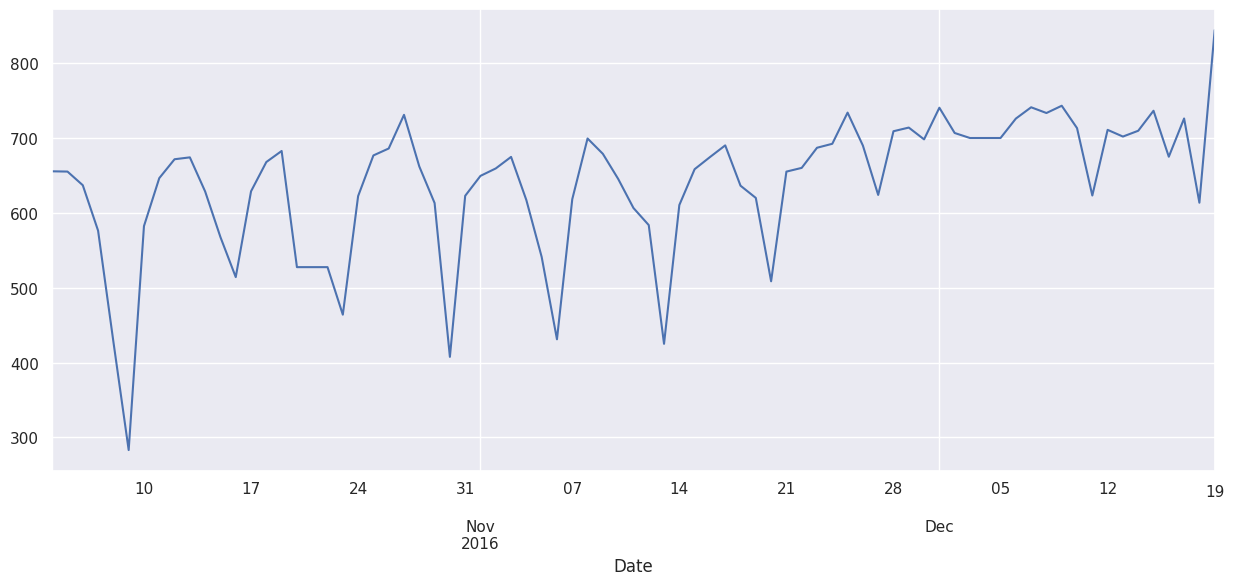

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

output of the above visualization:The above plot reveals some pattern in the time series. It has a seasonality pattern but no increasing or decreasing trend. The pattern reveals that the Occupancy has increased in December month. May be it is due to Christmas celebrations in December.

***USING EXPERIMENT 1 AND PERFORMING IT ON OUR DATASET***

**trends:**

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

Text(0.5, 1.0, 'trending using hp filter')

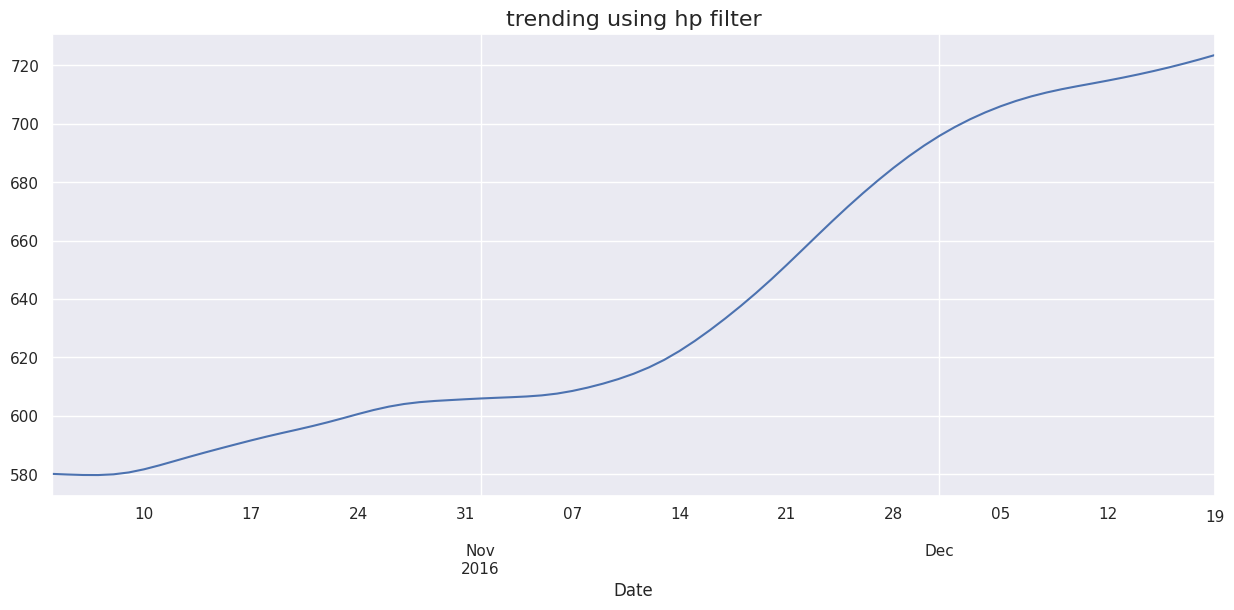

In [ ]:
y_cycle,y_trend=hpfilter(y,lamb=1600)
y_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('trending using hp filter', fontsize=16)

output of the above plot: The above plot shows the upwards trend in time series. It can be used to understand the structure of the time series.

**detrending:**

detrending using pandas.

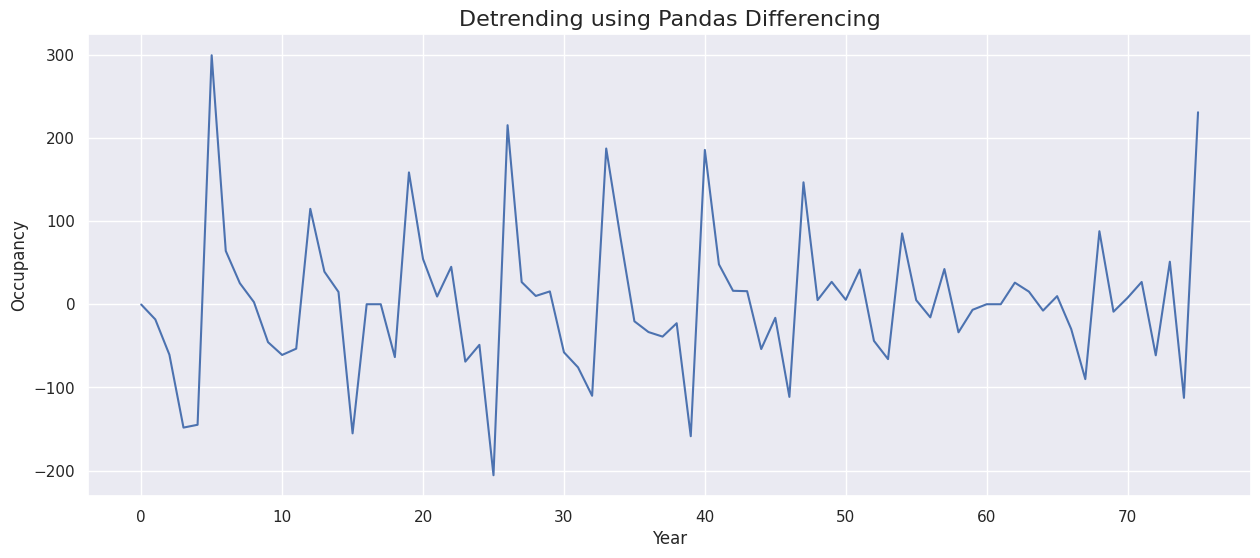

In [ ]:
X=y.values
diff= list()
for i in range(1, len(X)):
  value= X[i] -X[i-1]
  diff.append(value)
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Occupancy')
plt.show()

detrending using scipy

In [ ]:
from scipy import signal

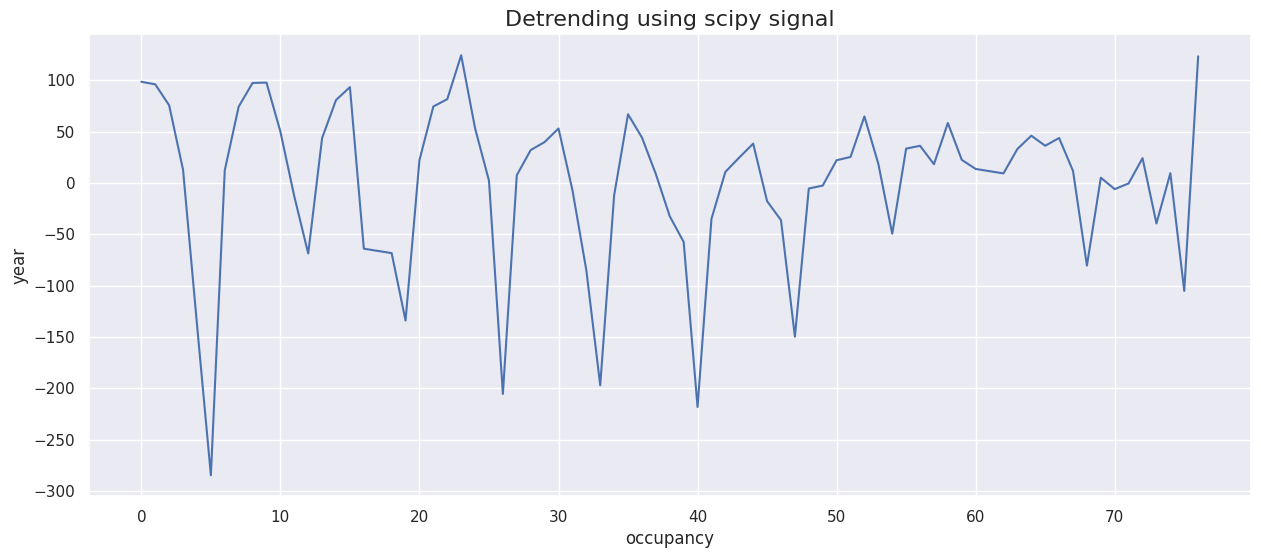

In [ ]:
detrended = signal.detrend(y.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel("occupancy")
plt.ylabel("year")
plt.title('Detrending using scipy signal',fontsize=16)
plt.show()

output of the above plot:detrending is important because many forecasting methods are built upon this concept of structured decomposition to produce forecasts.

***USING EXPERIMENT 2 FOR FURTHER INSIGHTS:***

Detecting seasonality using autocorrelation plot

In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
df


,Occupancy,Time,y
Date,,,
2016-10-04,61,07:59:42,655.543651
2016-10-04,64,08:25:42,655.543651
2016-10-04,80,08:59:42,655.543651
2016-10-04,107,09:32:46,655.543651
2016-10-04,150,09:59:48,655.543651
...,...,...,...
2016-12-19,1517,14:30:33,844.256410
2016-12-19,1487,15:03:34,844.256410
2016-12-19,1432,15:29:33,844.256410


deseasonalising using seasonal decompose

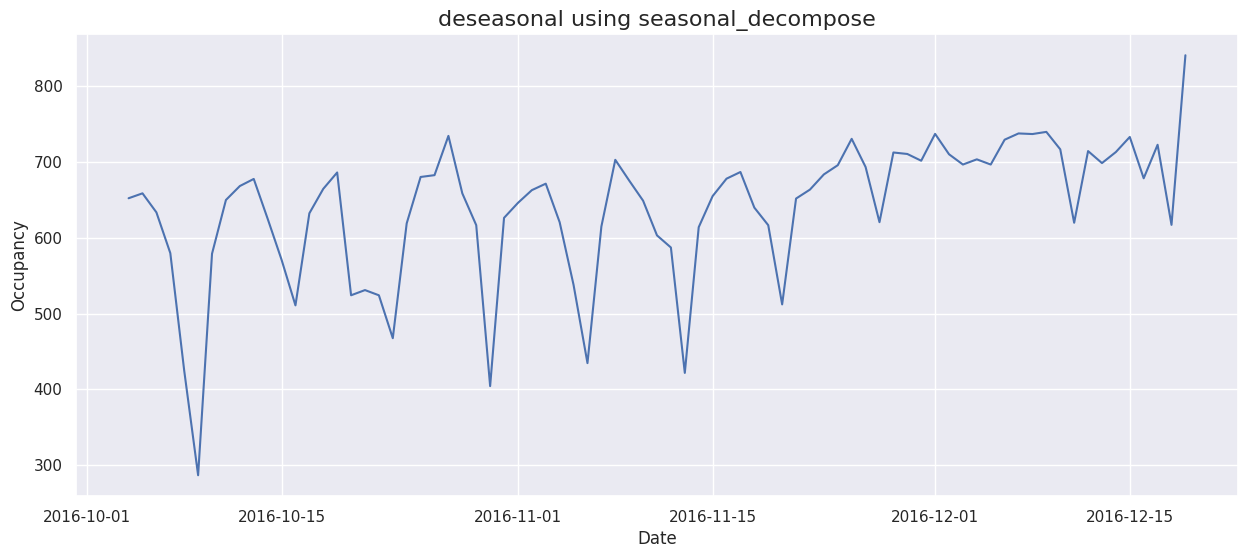

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add=seasonal_decompose(y ,model='additive',extrapolate_trend='freq',period=2)
deseason=y-result_add.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('deseasonal using seasonal_decompose',fontsize=16)
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

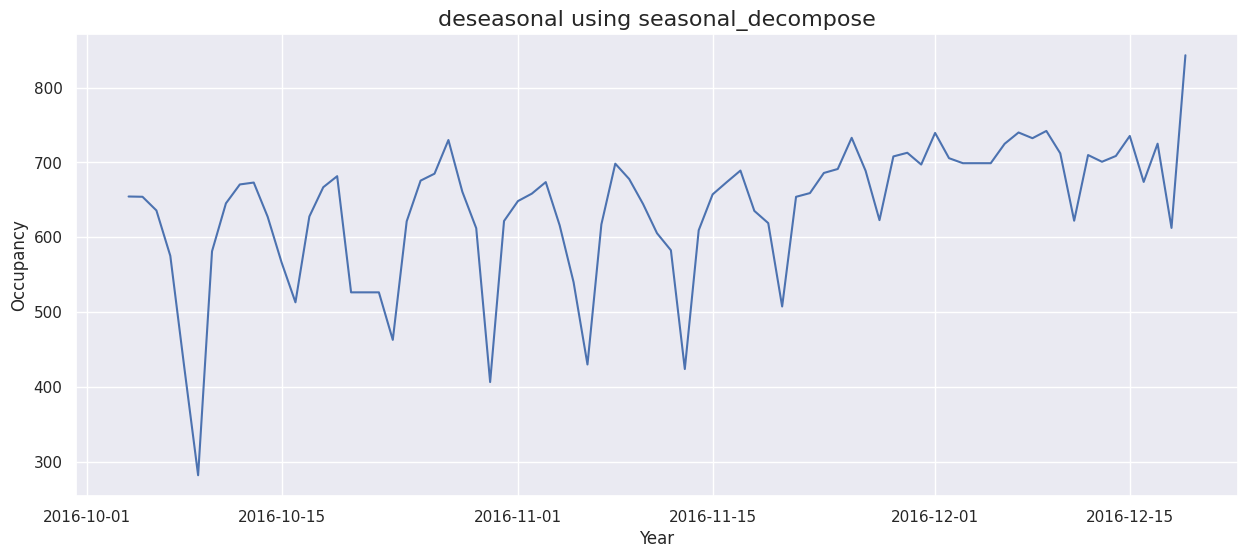

In [ ]:
result_add=seasonal_decompose(y ,model='multiplicative',extrapolate_trend='freq',period=2)
deseason=y -result_add.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('deseasonal using seasonal_decompose',fontsize=16)
plt.xlabel('Year')
plt.ylabel('Occupancy')
plt.show()

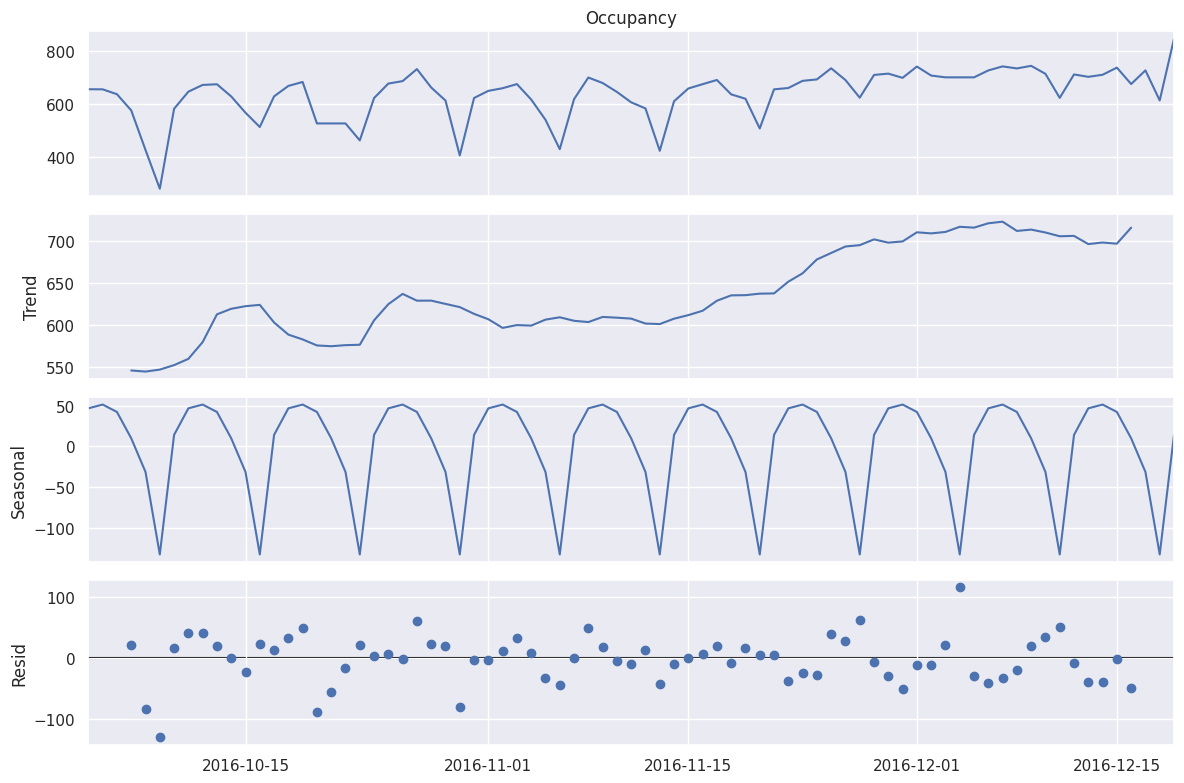

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

It helps us to identify variation in the time series. The above plot shows the upwards trend in time series. It can be used to understand the structure of the time series.

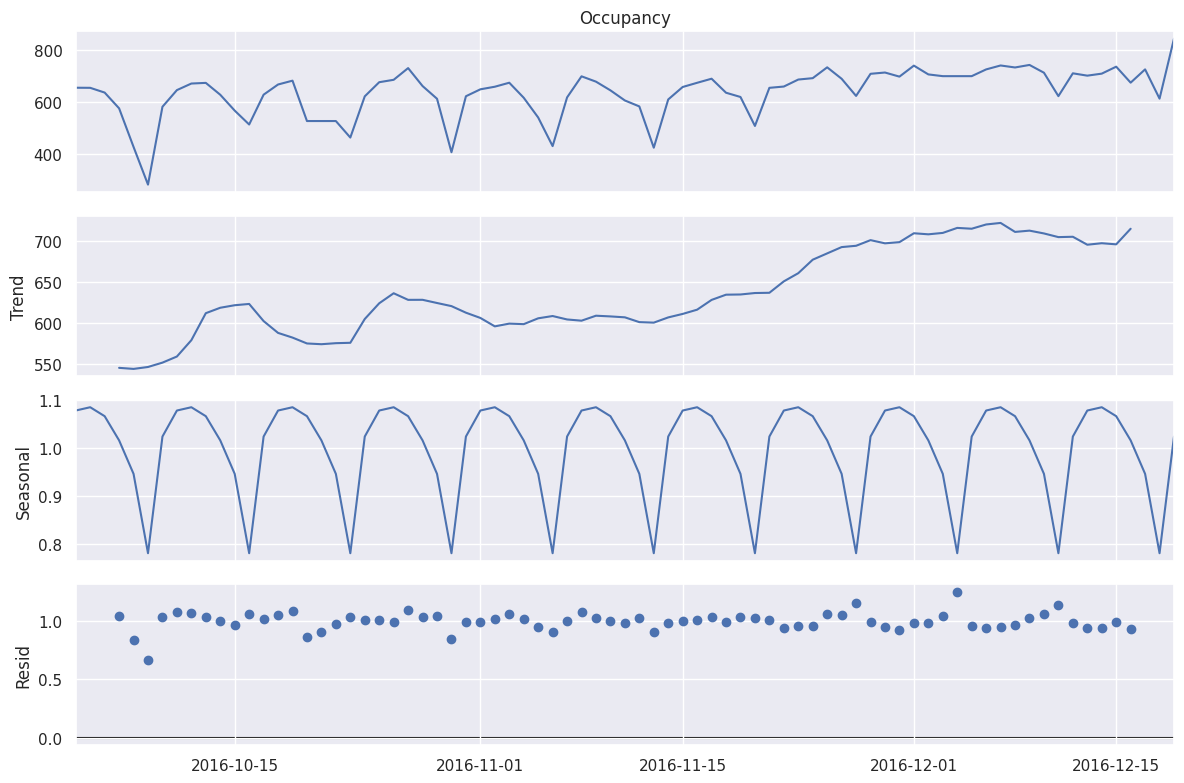

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

The 'additive' model assumes that the seasonal and trend components are additive, meaning they are added to the level of the data. This is suitable when the magnitude of seasonality does not change with the level of the data. residual component in the additive seasonal decomposition is larger or more prominent than in the multiplicative seasonal decomposition